<img src="Images/Logo.png" width="15%" align="right" hpsace="50">

# Fun with Machine Learning 

Inspired by __[Machine Learning Recipes with Josh Gordon](https://www.youtube.com/watch?v=cKxRvEZd3Mw&list=PLOU2XLYxmsIIuiBfYad6rFYQU_jL2ryal)__.

# Fruit classifier

<img src="Images/apple-orange.jpg" width="25%" align="right" hpsace="10">

We are writing a fruit classifier program that can recognize apples and oranges based on weight and smoothness of the surface. Rather than hard coding this for apples and oranges, we will use machine learning to classify any fruit (or other items) based on training data which include the correct label. In our case we have a long list of weights and surface smoothness values labelled with the correct fruit. From this data set, the computer will learn and be able to classify objects it learned about.

A great thing about Python is that there are extensions for lots of different things you want to do, including machine learning! The code below reads those extenstions we need. Simply click in the cell below and hit `shift+enter` to execute.

In [2]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd

## Reading training data

First we need to read the *labeled* data we want to learn from. In this example we used *supervised machine learning*, so we need to have a data set containing features as well as the correct label. Let's read the data and have a look. Hit `shitf+enter` in the next cell.

In [3]:
# Reading the data
data = pd.read_csv('Data/Fruit.csv')

# Showing the first 5 lines of data on the screen
data.head(5)

,Weight,Surface,Fruit
0,142.533160,0.849955,0
1,147.921747,0.624190,0
2,146.834463,0.898738,0
3,137.184578,0.715882,0
4,148.781653,0.791810,0


Let us check how many entries for apples and oranges we have. What would be good or bad numbers for the classifier to work?

In [90]:
# Count how many entries of each type we have in the column 'Fruit'
pd.value_counts(data['Fruit'].values)

1    100
0    100
dtype: int64

In our data set `Weight` contains the weight of the fruit and `Surface` tells us if the surface of the fruit is *smooth* (high value) or *rough* (low value). These two columns we call **features** as they later are the inputs we used to classified an unknown fruit. The last column `Fruit` is the label. So in this data set we *know* the corresponding fruit - encoded **0** for **Orange** and **1** for **Apple**.

Next we need to split our dataset into features (columns `Weight` and `Surface`) and labels (column `Fruit`).

In [82]:
# Features are the columns 'weight' and 'surface' in the data set
features = data[['Weight', 'Surface']].values

# Labels is the column containing the type of fruit (0=Organe, 1=Apple)
labels = data['Fruit'].values

## Visualizing the data

Now that we have the data, it is always good to visualize them. This is easy in case of just two features and can become rather challenging for complex data sets.

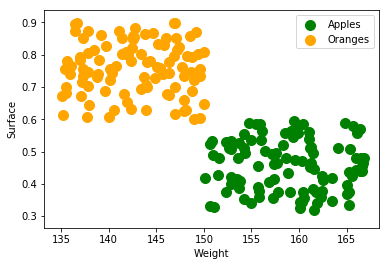

In [78]:
# Code to plot the data set
plt.scatter(data['Weight'][data['Fruit']==1], data['Surface'][data['Fruit']==1], c='green',  label='Apples',  s=100)
plt.scatter(data['Weight'][data['Fruit']==0], data['Surface'][data['Fruit']==0], c='orange', label='Oranges', s=100)

plt.xlabel('Weight')
plt.ylabel('Surface')
plt.legend()
plt.show()

## Training

Now we are ready to train. As you heard already, there are many different traing models. We specify `KNeighborsClassifier` as our classifier and then simple call `fit` using our feature and label arrays. Again just run the cell by enetring `shift+enter`.

In [83]:
# Selecting the classifier we want to use
knn = KNeighborsClassifier()

# Learning based on features and labels from our dataset
knn.fit(features, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Now use the trained network to make predictions

So now we have our trained network. Let us explore how well it works, by making predictions. Explore by changing the values for weight and surface and see which fruit the computer predicts. Remember **0** stands for **Orange** and **1** for an **Apple**. 

In [84]:
# Specify weight and surface value for unknown fruit
weight = 160
surface = 0.3

# Use the computer to predict which kind of fruit this might be and print it
print (knn.predict([[weight, surface]]))

[1]


If you feel up to it, use your Python knowledge and modify the code above so it prints *Apple* or *Orange* on the screen rather than 0 or 1. You can also use the `input` command to prompt for weight and surface information.

## Have fun